# 911 Calls Data EDA

For this project, I will be analyzing some 911 call data of Pensylvania, USA from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) to find out the most common reasons, peak hours, and other such details.

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

Import required libraries for this task
1. numpy
2. pandas
3. Matplotlib
4. Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as a dataframe called data_911**

Note: The csv file is located in the same local directory as this notebook.

In [2]:
data_911 = pd.read_csv('911.csv')

**Check the info() of the data_911**

In [3]:
data_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Check the head of data_911**

In [4]:
data_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [5]:
data_911['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [6]:
data_911['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**How many unique title codes are there?**

In [7]:
data_911['title'].nunique()

148

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reasons" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reasons column value would be EMS.**

In [8]:
Reasons = data_911['title'].apply(lambda x: x.split(':')[0])
data_911['Reasons'] = Reasons

**What is the most common Reason for a 911 call based off of this new column?**

In [9]:
data_911['Reasons'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reasons, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='Reasons', ylabel='count'>

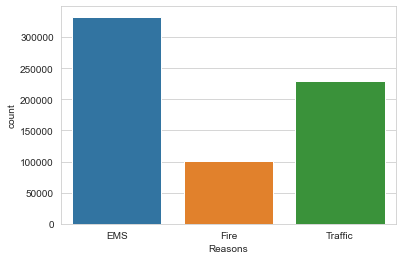

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Reasons', data = data_911)

**What is the data type of the objects in the timeStamp column?**

In [11]:
type(data_911['timeStamp'][0])

str

**Convert the column timeStamp from string to DateTime object.**

In [12]:
data_911['timeStamp'] = pd.to_datetime(data_911['timeStamp'])

In [13]:
type(data_911['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

**Now that the timestamp column are actually DateTime objects, create 3 new columns called Hour, Month, and Day of Week.**

In [14]:
data_911['Hour'] = data_911['timeStamp'].apply(lambda x: x.hour)
data_911['Month'] = data_911['timeStamp'].apply(lambda x: x.month)
data_911['Day of Week'] = data_911['timeStamp'].apply(lambda x: x.dayofweek)

In [15]:
data_911['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

In [16]:
data_911['Month']

0         12
1         12
2         12
3         12
4         12
          ..
663517     7
663518     7
663519     7
663520     7
663521     7
Name: Month, Length: 663522, dtype: int64

In [17]:
data_911['Day of Week']

0         3
1         3
2         3
3         3
4         3
         ..
663517    2
663518    2
663519    2
663520    2
663521    2
Name: Day of Week, Length: 663522, dtype: int64

**Notice how the Day of Week is an integer 0-6. Use the .map() to map the actual string names to the day of the week**

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
data_911['Day of Week'] = data_911['Day of Week'].map(dmap)

In [20]:
data_911['Day of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
663517    Wed
663518    Wed
663519    Wed
663520    Wed
663521    Wed
Name: Day of Week, Length: 663522, dtype: object

**Now use seaborn to create a countplot of the Day of Week column based off of the Reason column.**

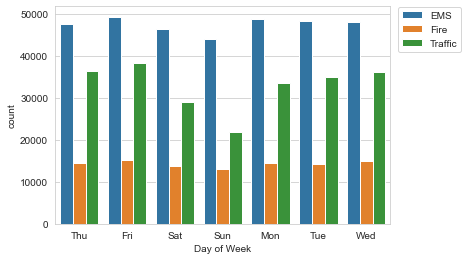

In [21]:
sns.countplot(x='Day of Week', data=data_911, hue='Reasons')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.02, 1), loc=0, borderaxespad=0.1)

**Now do the same for Month:**

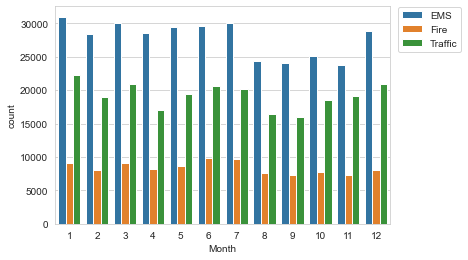

In [22]:
sns.countplot(x='Month', data=data_911, hue ='Reasons')

plt.legend(bbox_to_anchor=(1.02, 1), loc=0, borderaxespad=0.1)

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation.**

In [23]:
byMonth = data_911.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot:xlabel='Month'>

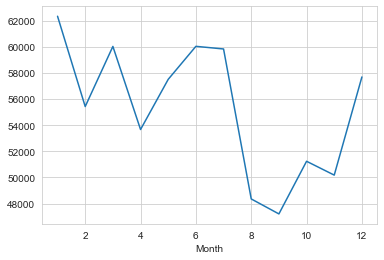

In [24]:
byMonth['title'].plot()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month.**

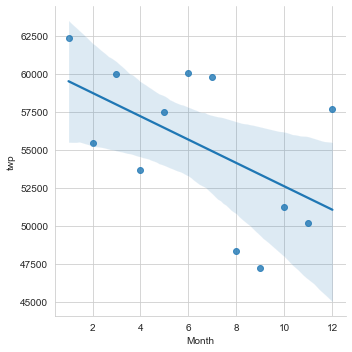

In [25]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [26]:
data_911['Date'] = data_911['timeStamp'].apply(lambda x: x.date())

In [27]:
data_911['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [28]:
byDate = data_911.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


<AxesSubplot:xlabel='Date'>

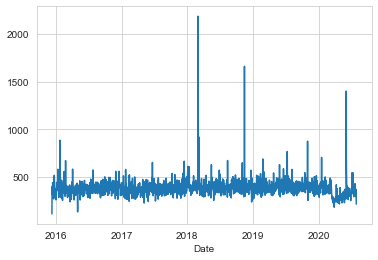

In [29]:
byDate['twp'].plot()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

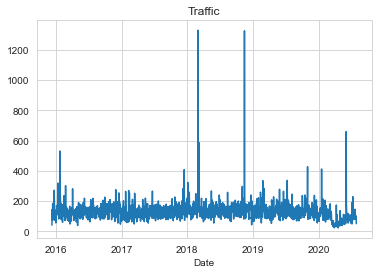

In [30]:
data_911[data_911['Reasons'] == 'Traffic'].groupby('Date')['twp'].count().plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

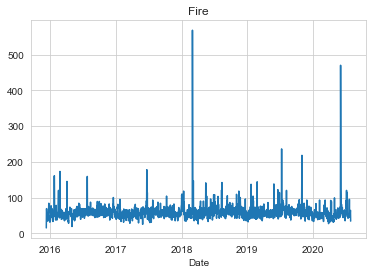

In [31]:
data_911[data_911['Reasons'] == 'Fire'].groupby('Date')['twp'].count().plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

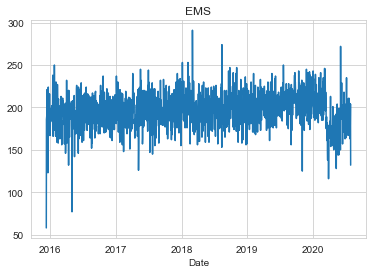

In [32]:
data_911[data_911['Reasons'] == 'EMS'].groupby('Date')['twp'].count().plot()
plt.title('EMS')

**Now move on to creating  heatmaps with seaborn and our data. First restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [33]:
dayHour = data_911.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


**Now create a HeatMap using this new DataFrame.**

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

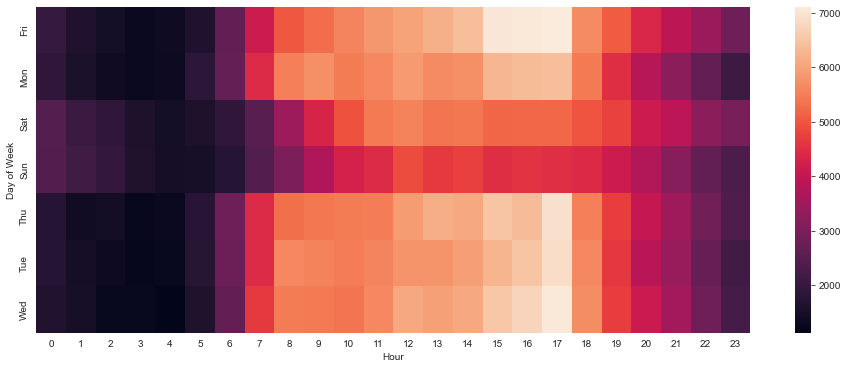

In [34]:
plt.figure(figsize=(16,6))
sns.heatmap(dayHour)

**Now create a clustermap using this DataFrame.**

<Figure size 1152x432 with 0 Axes>

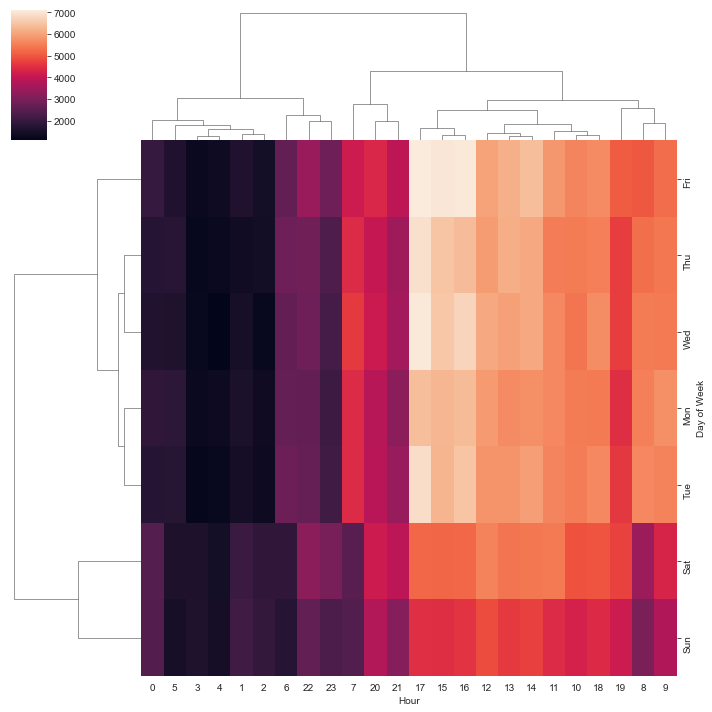

In [35]:
plt.figure(figsize=(16,6))
sns.clustermap(dayHour)

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [36]:
dayMonth = data_911.groupby(by=['Day of Week','Month']).count()['Reasons'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

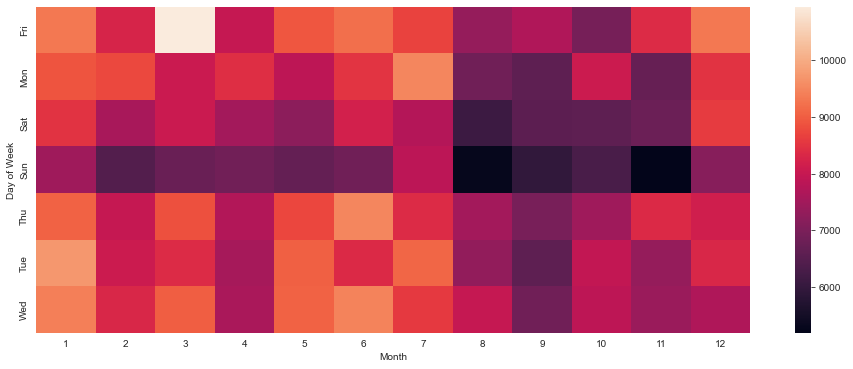

In [37]:
plt.figure(figsize=(16,6))
sns.heatmap(dayMonth)

<Figure size 1152x432 with 0 Axes>

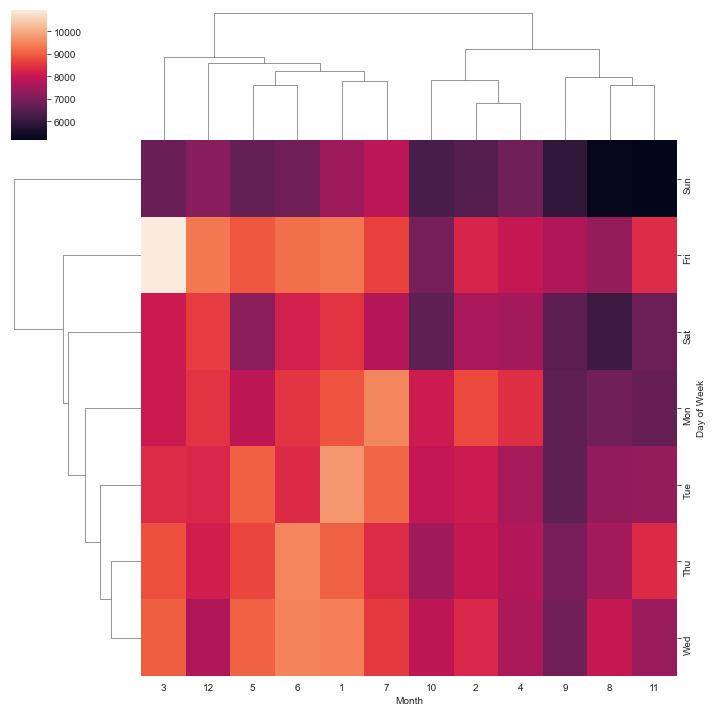

In [38]:
plt.figure(figsize=(16,6))
sns.clustermap(dayMonth)